In [1]:
import numpy as np

from itkwidgets import view
import matplotlib.pyplot as plt

import site
site.addsitedir("../src")

from mocoreg import mocoreg

In [2]:
app = mocoreg(register_to_frame_zero=True)
app.read_4d_bmode_matlab_file('../Data/bmenvRyanNonPermuted_1.dat', nframes=200, nlateral=102, nelevation=102, ndepth=92)

In [3]:
app.compute_keyframes()

In [4]:
print(app.keyframes)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 65, 75, 85, 95, 105, 115, 130, 145, 170, 199]


In [5]:
import time
start_time = time.perf_counter()
app.register_keyframes(app.keyframes)
end_time = time.perf_counter()

print("Time required for registration (seconds) = ", end_time-start_time)

Registering set 1 of 21: Frame = 5


itkImageF4 not loaded from module TubeTK because of exception:
 module 'itk.TubeTKPython' has no attribute 'itkImageF4'
vectoritkImageF4 not loaded from module TubeTK because of exception:
 module 'itk.TubeTKPython' has no attribute 'vectoritkImageF4'


Registering set 2 of 21: Frame = 10
Registering set 3 of 21: Frame = 15
Registering set 4 of 21: Frame = 20
Registering set 5 of 21: Frame = 25
Registering set 6 of 21: Frame = 30
Registering set 7 of 21: Frame = 35
Registering set 8 of 21: Frame = 40
Registering set 9 of 21: Frame = 45
Registering set 10 of 21: Frame = 50
Registering set 11 of 21: Frame = 55
Registering set 12 of 21: Frame = 65
Registering set 13 of 21: Frame = 75
Registering set 14 of 21: Frame = 85
Registering set 15 of 21: Frame = 95
Registering set 16 of 21: Frame = 105
Registering set 17 of 21: Frame = 115
Registering set 18 of 21: Frame = 130
Registering set 19 of 21: Frame = 145
Registering set 20 of 21: Frame = 170
Registering set 21 of 21: Frame = 199
Done!
Time required for registration (seconds) =  308.16177150000004


In [6]:
app.interpolate_keyframe_transforms(app.keyframes)

In [7]:
app.apply_transforms()

In [8]:
tmp = [ list(app.transforms[x].GetParameters()) for x in range(len(app.transforms))]
print(len(tmp), len(app.data_array))
rx = np.array([v[0] for v in tmp])
ry = np.array([v[1] for v in tmp])
rz = np.array([v[2] for v in tmp])
x = np.array([v[3] for v in tmp])
y = np.array([v[4] for v in tmp])
z = np.array([v[5] for v in tmp])
sx = np.array([v[6] for v in tmp])
sy = np.array([v[7] for v in tmp])
sz = np.array([v[8] for v in tmp])
kx = np.array([v[9] for v in tmp])
ky = np.array([v[10] for v in tmp])
kz = np.array([v[11] for v in tmp])

199 200


In [9]:
from matplotlib import pyplot as plt

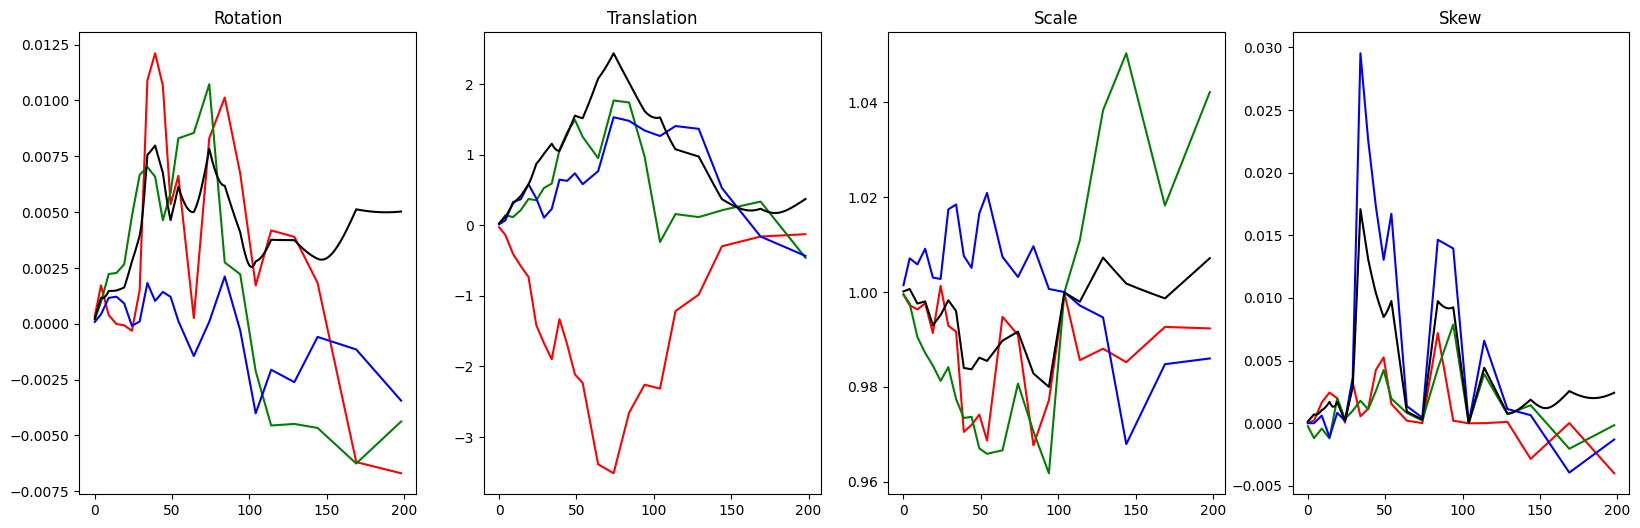

In [10]:
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
plt.plot(rx,'r'),plt.plot(ry,'g'),plt.plot(rz,'b'),plt.plot(np.sqrt((rx*rx+ry*ry+rz*rz)/3),'k')
plt.title("Rotation")
plt.subplot(1,4,2)
plt.plot(x,'r'),plt.plot(y,'g'),plt.plot(z,'b'),plt.plot(np.sqrt((x*x+y*y+z*z)/3),'k')
plt.title("Translation")
plt.subplot(1,4,3)
plt.plot(sx,'r'),plt.plot(sy,'g'),plt.plot(sz,'b'),plt.plot(np.sqrt((sx*sx+sy*sy+sz*sz)/3),'k')
plt.title("Scale")
plt.subplot(1,4,4)
plt.plot(kx,'r'),plt.plot(ky,'g'),plt.plot(kz,'b'),plt.plot(np.sqrt((kx*kx+ky*ky+kz*kz)/3),'k')
plt.title("Skew");

In [11]:
meansq, diffs = app.compute_inter_keyframe_diffs()
meansq_reg, diffs_reg = app.compute_inter_keyframe_diffs(data_array=app.data_array_reg)

In [12]:
print(diffs, meansq)
print("")
print(diffs_reg, meansq_reg)

[37764.01652854487, 52354.95911277654, 59473.60055926443, 73722.75574413603, 88762.77062286655, 104149.63802678093, 115717.53676256536, 123470.97319108735, 130964.96081261324, 137755.5920566992, 142788.277512822, 147624.50714354412, 146349.53241078815, 145882.8021710833, 138121.7725595371, 122372.825809421, 103557.17434394754, 88557.49326112207, 74116.10320950681, 71517.00594326889, 62068.81513276331] 108800.92762505265

[35604.671783632155, 44444.08475702444, 47841.64271228187, 51927.014395766164, 54938.93607746547, 56476.86561680802, 61893.7720770899, 66926.16738539531, 70029.80991067342, 72448.20286883971, 74354.31550056605, 78152.11081417456, 75535.34140114553, 76650.27893818782, 79645.67150742389, 76689.59442985586, 73527.57602794046, 69959.04875053196, 61995.71107279961, 59810.28547010122, 58386.28843442515] 65272.74787139257


In [13]:
print( np.sum(np.abs(app.data_array[0] - app.data_array[10])))
print( np.sum(np.abs(app.data_array_reg[0] - app.data_array_reg[10])))

26360638546.137257
22662388688.49592
